Enter latitude :25.60122
Enter longitude : 85.001


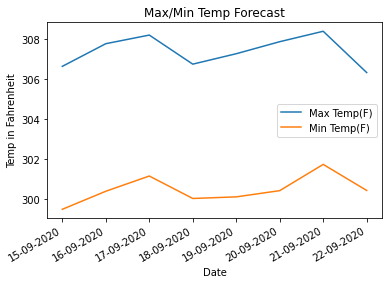

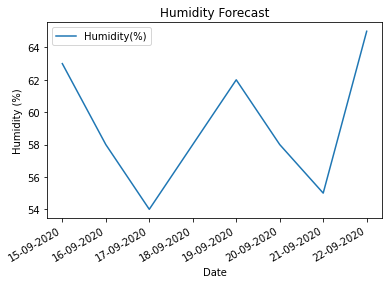

In [32]:
import json
import time
import requests

import matplotlib.pyplot as plt

api_key = "bc030420b97cb4fe8c2ed8621f5762e7"
url = "https://api.openweathermap.org/data/2.5/onecall"

lat = input("Enter latitude :") 
long = input("Enter longitude : ") 

params = {"lat": lat, "lon": long, "appid": api_key, "exclude": "hourly,minutely"}

response = requests.post(url, params=params)
data = json.loads(response.text)

daily_forecasts = data.get("daily", [])
dates = []
max_temps = []
min_temps = []
humidities = []
for day in daily_forecasts:
    date = int(day['dt'])
    dates.append(time.strftime('%d-%m-%Y', time.localtime(date)))
    
    max_temps.append(day['temp']['max'])
    min_temps.append(day['temp']['min'])
    humidities.append(day['humidity'])

fig, ax = plt.subplots()
ax.plot(dates, max_temps, label='Max Temp(F)')
ax.plot(dates, min_temps, label='Min Temp(F)')
fig.autofmt_xdate()
ax.set_xlabel("Date")
ax.set_ylabel("Temp in Fahrenheit")
ax.set_title("Max/Min Temp Forecast")
ax.legend()

fig2, ax2 = plt.subplots()
ax2.plot(dates, humidities, label="Humidity(%)")
fig2.autofmt_xdate()
ax2.set_xlabel("Date")
ax2.set_ylabel("Humidity (%)")
ax2.set_title("Humidity Forecast")
ax2.legend()